In [12]:
#install.packages(c("missForest","e1701","rpart","tree","party","caret", repos = "https://cran.us.r-project.org"))

library(missForest)
library(rpart)
library(tree)
library(party)
library(e1071)
library(caret)

In [13]:
# Read Data

data<-read.csv(file='C:/Users/Abhinav/Documents/train.csv', header=TRUE)
data.test<-read.csv(file='C:/Users/Abhinav/Documents/test.csv', header=TRUE)
dim(data)
names(data)

[1] 18255  1235

[1] "train_id"         "AA3"              "AA4"             
   [4] "AA5"              "AA6"              "AA7"             
   [7] "AA14"             "AA15"             "DG1"             
  [10] "is_female"        "DG3"              "DG3A"            
  [13] "DG3A_OTHERS"      "DG4"              "DG4_OTHERS"      
  [16] "DG5_1"            "DG5_2"            "DG5_3"           
  [19] "DG5_4"            "DG5_5"            "DG5_6"           
  [22] "DG5_7"            "DG5_8"            "DG5_9"           
  [25] "DG5_10"           "DG5_11"           "DG5_96"          
  [28] "DG6"              "DG8a"             "DG8b"            
  [31] "DG8c"             "DG9a"             "DG9b"            
  [34] "DG9c"             "DG10b"            "DG10c"           
  [37] "DG11b"            "DG11c"            "DG12B_1"         
  [40] "DG12B_2"          "DG12C_1"          "DG12C_2"         
  [43] "DG13_1"           "DG13_2"           "DG13_3"          
  [46] "DG13_4"           "DG13_5"           "DG13_96"         
  [49] "DG13_7"           "DG13_OTHERS"      "DG14"            
  [52] "DG14_OTHERS"      "DL0"              "DL1"             
  [55] "DL1_OTHERS"       "DL2"              "DL2_23_OTHERS"   
  [58] "DL2_96_OTHERS"    "DL3"              "DL4_1"           
  [61] "DL4_2"            "DL4_3"            "DL4_4"           
  [64] "DL4_5"            "DL4_6"            "DL4_7"           
  [67] "DL4_8"            "DL4_9"            "DL4_10"          
  [70] "DL4_11"           "DL4_12"           "DL4_13"          
  [73] "DL4_14"           "DL4_15"           "DL4_16"          
  [76] "DL4_17"           "DL4_18"           "DL4_19"          
  [79] "DL4_20"           "DL4_21"           "DL4_22"          
  [82] "DL4_23"           "DL4_96"           "DL4_99"          
  [85] "DL4_OTHERS"       "DL5"              "DL6"             
  [88] "DL7"              "DL8"              "DL11"            
  [91] "DL12"             "DL12_OTHERS"      "DL13"            
  [94] "DL14"             "DL15"             "DL16"            
  [97] "DL17"             "DL18"             "DL19"            
 [100] "DL20"             "DL21"             "DL22"            
 [103] "DL23"             "DL24"             "DL25_1"          
 [106] "DL25_2"           "DL25_3"           "DL25_4"          
 [109] "DL25_5"           "DL25_6"           "DL25_7"          
 [112] "DL25_8"           "DL26_1"           "DL26_2"          
 [115] "DL26_3"           "DL26_4"           "DL26_5"          
 [118] "DL26_6"           "DL26_7"           "DL26_8"          
 [121] "DL26_9"           "DL26_10"          "DL26_12"         
 [124] "DL26_99"          "DL27"             "DL28"            
 [127] "DL28_OTHERS"      "G2P1_1"           "G2P1_2"          
 [130] "G2P1_3"           "G2P1_4"           "G2P1_5"          
 [133] "G2P1_6"           "G2P1_7"           "G2P1_8"          
 [136] "G2P1_9"           "G2P1_10"          "G2P1_11"         
 [139] "G2P1_12"          "G2P1_13"          "G2P1_14"         
 [142] "G2P1_15"          "G2P1_16"          "G2P1_96"         
 [145] "G2P1_99"          "G2P1_OTHERS"      "G2P2_1"          
 [148] "G2P2_2"           "G2P2_3"           "G2P2_4"          
 [151] "G2P2_5"           "G2P2_6"           "G2P2_7"          
 [154] "G2P2_8"           "G2P2_9"           "G2P2_10"         
 [157] "G2P2_11"          "G2P2_12"          "G2P2_13"         
 [160] "G2P2_14"          "G2P2_15"          "G2P2_16"         
 [163] "G2P2_96"          "G2P2_1_OTHERS"    "G2P2_2_OTHERS"   
 [166] "G2P2_4_OTHERS"    "G2P2_6_OTHERS"    "G2P2_7_OTHERS"   
 [169] "G2P2_8_OTHERS"    "G2P2_9_OTHERS"    "G2P2_10_OTHERS"  
 [172] "G2P2_11_OTHERS"   "G2P2_12_OTHERS"   "G2P2_13_OTHERS"  
 [175] "G2P2_14_OTHERS"   "G2P2_15_OTHERS"   "G2P2_16_OTHERS"  
 [178] "G2P2_96_OTHERS"   "G2P3_1"           "G2P3_2"          
 [181] "G2P3_3"           "G2P3_4"           "G2P3_5"          
 [184] "G2P3_6"           "G2P3_7"           "G2P3_8"          
 [187] "G2P3_9"           "G2P3_10"

[1] 18255   360

[1] 18255   268

[1] "DG9a"     "MT1A"     "MM3_1"    "MM3_2"    "MM3_3"    "MM3_4"   
 [7] "MM3_5"    "MM3_6"    "MM3_7"    "MM3_8"    "MM3_9"    "MM3_10"  
[13] "MM3_11"   "MM3_12"   "MM3_13"   "MM3_14"   "IFI16_1"  "IFI17_1" 
[19] "FB19B_1"  "FB19B_2"  "FB19B_3"  "FB19B_4"  "FB19B_5"  "FB19B_96"
[25] "FB20"

DG9a     MT1A    MM3_1    MM3_2    MM3_3    MM3_4    MM3_5    MM3_6 
     232      757       86      425       37       11        6       47 
   MM3_7    MM3_8    MM3_9   MM3_10   MM3_11   MM3_12   MM3_13   MM3_14 
      21       21       10        7       34       20      159       16 
 IFI16_1  IFI17_1  FB19B_1  FB19B_2  FB19B_3  FB19B_4  FB19B_5 FB19B_96 
    2129     2129      769      444      297      247      263       63 
    FB20 
    1494

train_id              AA3              AA4              AA7 
           18255                4               22             1050 
            AA14             AA15              DG1        is_female 
             907              450               79                2 
             DG3             DG3A              DG4            DG5_1 
               9                8               12                2 
           DG5_2            DG5_3            DG5_4            DG5_5 
               2                2                2                2 
           DG5_6            DG5_7            DG5_8            DG5_9 
               2                2                2                2 
          DG5_10           DG5_11           DG5_96              DG6 
               2                2                1                9 
            DG8a             DG8b             DG8c             DG9a 
              13               13               13               13 
             DL0              DL1            DL4_1            DL4_2 
               2               12                2                2 
           DL4_3            DL4_4            DL4_5            DL4_6 
               2                2                2                2 
           DL4_7            DL4_8            DL4_9           DL4_10 
               2                2                2                2 
          DL4_11           DL4_12           DL4_13           DL4_14 
               2                2                2                2 
          DL4_15           DL4_16           DL4_17           DL4_18 
               2                2                2                2 
          DL4_19           DL4_20           DL4_21           DL4_22 
               2                2                2                2 
          DL4_23           DL4_96           DL4_99              DL6 
               2                2                2                2 
            DL11             DL14             DL15             DL16 
              15               24                4                2 
            DL17             DL18             DL19             DL20 
               2                2                2                2 
            DL21             DL22             DL23             DL24 
               2                2                2                7 
          DL25_1           DL25_2           DL25_3           DL25_4 
               2                2                2                2 
          DL25_5           DL25_6           DL25_7           DL25_8 
               2                2                2                2 
          DL26_1           DL26_2           DL26_3           DL26_4 
               2                2                2                2 
          DL26_5           DL26_6           DL26_7           DL26_8 
               2                2                2                2 
          DL26_9          DL26_10          DL26_12          DL26_99 
               2                2                2                2 
             MT1             MT1A              MT2             MT10 
              13                8                2                2 
             FF1              MM1            MM2_1            MM2_2 
               2                2                2                2 
           MM2_3            MM2_4            MM2_5            MM2_6 
               2                2                2                2 
           MM2_7            MM2_8            MM2_9           MM2_10 
               2                2                2                2 
          MM2_11           MM2_12           MM2_13           MM2_14 
               2                2                2                2 
          MM2_15           MM2_16            MM3_1            MM3_2 
               2                1                3                3 
           MM3_3            MM3_4            MM3_5            MM3_6 
               3                3                3                3 
      

[1] "train_id"         "AA7"              "AA14"             "AA15"            
[5] "DG1"              "LN2_RIndLngBEOth" "LN2_WIndLngBEOth"

character(0)

[1] 18255   261

[1] "AA3"       "AA4"       "is_female" "DG3"       "DG3A"      "DG4"      
  [7] "DG5_1"     "DG5_2"     "DG5_3"     "DG5_4"     "DG5_5"     "DG5_6"    
 [13] "DG5_7"     "DG5_8"     "DG5_9"     "DG5_10"    "DG5_11"    "DG5_96"   
 [19] "DG6"       "DG8a"      "DG8b"      "DG8c"      "DG9a"      "DL0"      
 [25] "DL1"       "DL4_1"     "DL4_2"     "DL4_3"     "DL4_4"     "DL4_5"    
 [31] "DL4_6"     "DL4_7"     "DL4_8"     "DL4_9"     "DL4_10"    "DL4_11"   
 [37] "DL4_12"    "DL4_13"    "DL4_14"    "DL4_15"    "DL4_16"    "DL4_17"   
 [43] "DL4_18"    "DL4_19"    "DL4_20"    "DL4_21"    "DL4_22"    "DL4_23"   
 [49] "DL4_96"    "DL4_99"    "DL6"       "DL11"      "DL14"      "DL15"     
 [55] "DL16"      "DL17"      "DL18"      "DL19"      "DL20"      "DL21"     
 [61] "DL22"      "DL23"      "DL24"      "DL25_1"    "DL25_2"    "DL25_3"   
 [67] "DL25_4"    "DL25_5"    "DL25_6"    "DL25_7"    "DL25_8"    "DL26_1"   
 [73] "DL26_2"    "DL26_3"    "DL26_4"    "DL26_5"    "DL26_6"    "DL26_7"   
 [79] "DL26_8"    "DL26_9"    "DL26_10"   "DL26_12"   "DL26_99"   "MT1"      
 [85] "MT1A"      "MT2"       "MT10"      "FF1"       "MM1"       "MM2_1"    
 [91] "MM2_2"     "MM2_3"     "MM2_4"     "MM2_5"     "MM2_6"     "MM2_7"    
 [97] "MM2_8"     "MM2_9"     "MM2_10"    "MM2_11"    "MM2_12"    "MM2_13"   
[103] "MM2_14"    "MM2_15"    "MM2_16"    "MM3_1"     "MM3_2"     "MM3_3"    
[109] "MM3_4"     "MM3_5"     "MM3_6"     "MM3_7"     "MM3_8"     "MM3_9"    
[115] "MM3_10"    "MM3_11"    "MM3_12"    "MM3_13"    "MM3_14"    "MM12_REC" 
[121] "MM13_REC"  "MMP1_1"    "MMP1_2"    "MMP1_3"    "MMP1_4"    "MMP1_5"   
[127] "MMP1_6"    "MMP1_7"    "MMP1_8"    "MMP1_9"    "MMP1_10"   "MMP1_11"  
[133] "MMP1_96"   "IFI1_1"    "IFI3_1"    "IFI1_2"    "IFI3_2"    "IFI1_3"   
[139] "IFI3_3"    "IFI1_4"    "IFI1_5"    "IFI1_6"    "IFI1_7"    "IFI1_8"   
[145] "IFI1_9"    "IFI14_1"   "IFI14_2"   "IFI14_3"   "IFI14_4"   "IFI14_5"  
[151] "IFI14_6"   "IFI14_7"   "IFI15_1"   "IFI15_2"   "IFI15_3"   "IFI15_4"  
[157] "IFI15_5"   "IFI15_6"   "IFI15_7"   "IFI16_1"   "IFI17_1"   "IFI18"    
[163] "FL1"       "FL4"       "FL6_1"     "FL6_2"     "FL6_3"     "FL6_4"    
[169] "FL7_1"     "FL7_2"     "FL7_3"     "FL7_4"     "FL7_5"     "FL7_6"    
[175] "FL8_1"     "FL8_2"     "FL8_3"     "FL8_4"     "FL8_5"     "FL8_6"    
[181] "FL8_7"     "FL9A"      "FL10"      "FL11"      "FL12"      "FL13"     
[187] "FL14"      "FL15"      "FL16"      "FL17"      "FL18"      "FB1_1"    
[193] "FB1_2"     "FB1_3"     "FB2"       "FB3"       "FB13"      "FB16_1"   
[199] "FB16_2"    "FB16_3"    "FB16_4"    "FB16_5"    "FB16_6"    "FB16_7"   
[205] "FB16_8"    "FB16_96"   "FB18"      "FB19"      "FB19A_1"   "FB19A_2"  
[211] "FB19A_3"   "FB19A_4"   "FB19A_5"   "FB19A_96"  "FB19B_1"   "FB19B_2"  
[217] "FB19B_3"   "FB19B_4"   "FB19B_5"   "FB19B_96"  "FB20"      "FB22_1"   
[223] "FB22_2"    "FB22_3"    "FB22_4"    "FB22_5"    "FB22_6"    "FB22_7"   
[229] "FB22_8"    "FB22_9"    "FB22_10"   "FB22_11"   "FB22_12"   "FB22_96"  
[235] "FB27_1"    "FB27_2"    "FB27_3"    "FB27_4"    "FB27_5"    "FB27_6"   
[241] "FB27_7"    "FB27_8"    "FB27_9"    "FB27_96"   "FB29_1"    "FB29_2"   
[247] "FB29_3"    "FB29_4"    "FB29_5"    "FB29_6"    "FB29_96"   "LN1A"     
[253] "LN1B"      "LN2_1"     "LN2_2"     "LN2_3"     "LN2_4"     "GN2"      
[259] "GN3"       "GN4"       "GN5"

[1] "AA3"       "AA4"       "is_female" "DG3"       "DG3A"      "DG4"      
  [7] "DG5_1"     "DG5_2"     "DG5_3"     "DG5_4"     "DG5_5"     "DG5_6"    
 [13] "DG5_7"     "DG5_8"     "DG5_9"     "DG5_10"    "DG5_11"    "DG5_96"   
 [19] "DG6"       "DG8a"      "DG8b"      "DG8c"      "DG9a"      "DL0"      
 [25] "DL1"       "DL4_1"     "DL4_2"     "DL4_3"     "DL4_4"     "DL4_5"    
 [31] "DL4_6"     "DL4_7"     "DL4_8"     "DL4_9"     "DL4_10"    "DL4_11"   
 [37] "DL4_12"    "DL4_13"    "DL4_14"    "DL4_15"    "DL4_16"    "DL4_17"   
 [43] "DL4_18"    "DL4_19"    "DL4_20"    "DL4_21"    "DL4_22"    "DL4_23"   
 [49] "DL4_96"    "DL4_99"    "DL6"       "DL11"      "DL14"      "DL15"     
 [55] "DL16"      "DL17"      "DL18"      "DL19"      "DL20"      "DL21"     
 [61] "DL22"      "DL23"      "DL24"      "DL25_1"    "DL25_2"    "DL25_3"   
 [67] "DL25_4"    "DL25_5"    "DL25_6"    "DL25_7"    "DL25_8"    "DL26_1"   
 [73] "DL26_2"    "DL26_3"    "DL26_4"    "DL26_5"    "DL26_6"    "DL26_7"   
 [79] "DL26_8"    "DL26_9"    "DL26_10"   "DL26_12"   "DL26_99"   "MT1"      
 [85] "MT1A"      "MT2"       "MT10"      "FF1"       "MM1"       "MM2_1"    
 [91] "MM2_2"     "MM2_3"     "MM2_4"     "MM2_5"     "MM2_6"     "MM2_7"    
 [97] "MM2_8"     "MM2_9"     "MM2_10"    "MM2_11"    "MM2_12"    "MM2_13"   
[103] "MM2_14"    "MM2_15"    "MM2_16"    "MM3_1"     "MM3_2"     "MM3_3"    
[109] "MM3_4"     "MM3_5"     "MM3_6"     "MM3_7"     "MM3_8"     "MM3_9"    
[115] "MM3_10"    "MM3_11"    "MM3_12"    "MM3_13"    "MM3_14"    "MM12_REC" 
[121] "MM13_REC"  "MMP1_1"    "MMP1_2"    "MMP1_3"    "MMP1_4"    "MMP1_5"   
[127] "MMP1_6"    "MMP1_7"    "MMP1_8"    "MMP1_9"    "MMP1_10"   "MMP1_11"  
[133] "MMP1_96"   "IFI1_1"    "IFI3_1"    "IFI1_2"    "IFI3_2"    "IFI1_3"   
[139] "IFI3_3"    "IFI1_4"    "IFI1_5"    "IFI1_6"    "IFI1_7"    "IFI1_8"   
[145] "IFI1_9"    "IFI14_1"   "IFI14_2"   "IFI14_3"   "IFI14_4"   "IFI14_5"  
[151] "IFI14_6"   "IFI14_7"   "IFI15_1"   "IFI15_2"   "IFI15_3"   "IFI15_4"  
[157] "IFI15_5"   "IFI15_6"   "IFI15_7"   "IFI16_1"   "IFI17_1"   "IFI18"    
[163] "FL1"       "FL4"       "FL6_1"     "FL6_2"     "FL6_3"     "FL6_4"    
[169] "FL7_1"     "FL7_2"     "FL7_3"     "FL7_4"     "FL7_5"     "FL7_6"    
[175] "FL8_1"     "FL8_2"     "FL8_3"     "FL8_4"     "FL8_5"     "FL8_6"    
[181] "FL8_7"     "FL9A"      "FL10"      "FL11"      "FL12"      "FL13"     
[187] "FL14"      "FL15"      "FL16"      "FL17"      "FL18"      "FB1_1"    
[193] "FB1_2"     "FB1_3"     "FB2"       "FB3"       "FB13"      "FB16_1"   
[199] "FB16_2"    "FB16_3"    "FB16_4"    "FB16_5"    "FB16_6"    "FB16_7"   
[205] "FB16_8"    "FB16_96"   "FB18"      "FB19"      "FB19A_1"   "FB19A_2"  
[211] "FB19A_3"   "FB19A_4"   "FB19A_5"   "FB19A_96"  "FB19B_1"   "FB19B_2"  
[217] "FB19B_3"   "FB19B_4"   "FB19B_5"   "FB19B_96"  "FB20"      "FB22_1"   
[223] "FB22_2"    "FB22_3"    "FB22_4"    "FB22_5"    "FB22_6"    "FB22_7"   
[229] "FB22_8"    "FB22_9"    "FB22_10"   "FB22_11"   "FB22_12"   "FB22_96"  
[235] "FB27_1"    "FB27_2"    "FB27_3"    "FB27_4"    "FB27_5"    "FB27_6"   
[241] "FB27_7"    "FB27_8"    "FB27_9"    "FB27_96"   "FB29_1"    "FB29_2"   
[247] "FB29_3"    "FB29_4"    "FB29_5"    "FB29_6"    "FB29_96"   "LN1A"     
[253] "LN1B"      "LN2_1"     "LN2_2"     "LN2_3"     "LN2_4"     "GN2"      
[259] "GN3"       "GN4"       "GN5"

[1]  23  18  24  84   3 163 260  85 258 259  86   5 257  19   2   9  52 182
 [19] 220  62 146  22  83 254  53 251 181 159 145 153 152 252 183   1 160 253
 [37] 256 174 180 176 175 255 177 178 179  21 187  30  20 162 196 188 207  29
 [55] 189 194 186 206   4   7 147 154  26 119  11 161  50  59  61  49  87  54
 [73] 148  15  60  58 164  51  12  55 185 168 195  56  57 151 149  88 155 169
 [91] 191  10 166 192 158 193 190 214 156 221  81 171  65 167 217 216 215 165
[109] 173 170 137 172 138 218  64  63  82 150   6 219  75 228 157  67  66 204
[127] 184  41  68  70  73  71 197  40  69  27 235 244  25 229  43 202 203   8
[145]  16  44  79 232 106  90 208 140 245 230  31 209  42 246  74  76  77 142
[163]  72 135  48 234 212 121 133 117 211  78 210 136  38 134  28 198  33 105
[181]  13 248 223 236 224  45  34 249  32 101 110 242 237 231 247  80  47 143
[199] 199  89 144 213  37  36 120  46  14 123 124 115  35 112 109 118 205 108
[217] 250 114  91 222 141  39 116 122  99  96 111 240 225 113 226 239 131 125
[235] 129 139 241  95 107  94 130 127 200 227  97 128  92 238 100 126  93 233
[253] 102  98 201 132 243 103  17 104

[1] "DL0"     "DG6"     "DL1"     "MT1A"    "DG3"     "FL4"     "GN5"    
 [8] "MT2"     "GN3"     "GN4"     "MT10"    "DG4"     "GN2"     "DG8a"   
[15] "AA4"     "DG5_4"   "DL14"    "FL10"    "FB20"    "DL24"    "IFI14_2"
[22] "DG9a"    "MT1"     "LN2_2"   "DL15"    "LN1A"    "FL9A"    "IFI16_1"
[29] "IFI14_1" "IFI15_2"

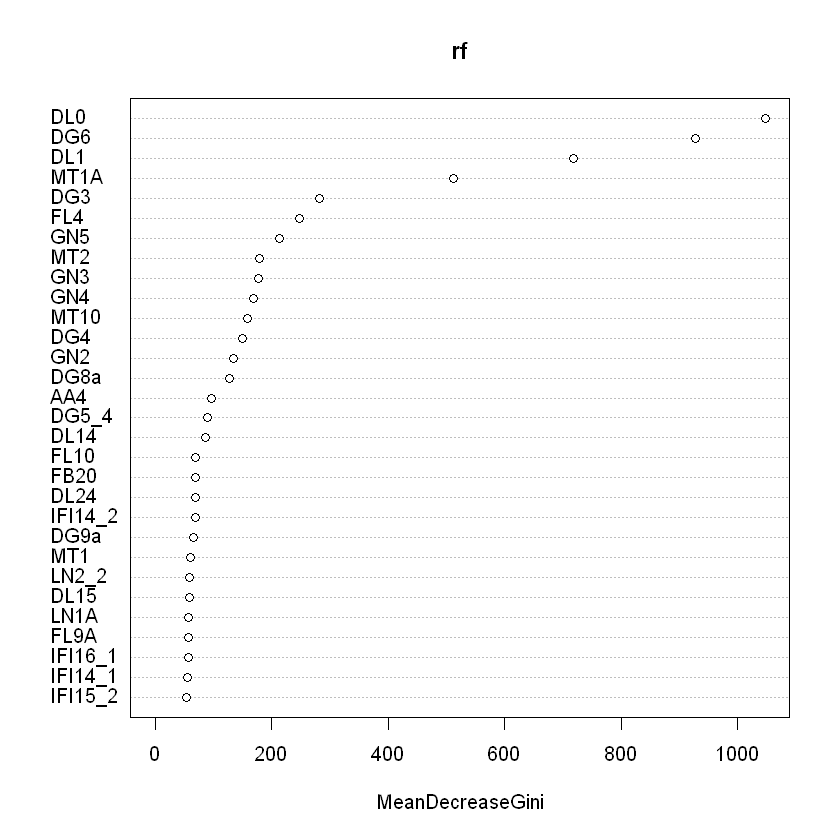

In [14]:
# remove columns where more than 20% data is missing
data.sub<-data[,-which(colMeans(is.na(data)) > 0.2)]
dim(data.sub)

# Remove columnsnames with _OTHERS since they do not contain any information
data.sub1 <- data.sub[,!grepl("OTHERS", colnames(data.sub))]
dim(data.sub1)

# see which columns have missing values
names(which(colSums(is.na(data.sub))>0)) 

# Prints counts of columns with missing values
M <- sapply(data.sub1, function(x) sum(is.na(x))); M[M>0]

# how many unique values in each column
sapply(data.sub1, function(col) length(unique(col)))

# Look for columns with greater than 50 categories and remove them since MissForest cannot deal with it
data.sub.sub<-data.sub1[, sapply(data.sub1, function(col) length(unique(col))) > 50]
names(data.sub.sub)
names(which(colSums(is.na(data.sub.sub))>0))

# Remove columns with greater than 50 categories
x1<-data.sub1[, -which(names(data.sub1) %in% c("train_id" ,  "AA7" ,  "AA14"   ,   
                                            "AA15"   ,  "DG1"   ,       "LN2_RIndLngBEOth" ,"LN2_WIndLngBEOth"))]

dim(x1)
names(x1)

#Use roughfix to impute data and then run RF for var selection
x2<-na.roughfix(x1)
names(x2)

# run RF for variable selection
rf<-randomForest(x2[,-3],as.factor(x2$is_female),iter=10,ntree=150)
pred.rf<-predict(rf,x2[,-3])
trf<-table(x2[,3],pred.rf)
accuracy.rf<-sum(diag(trf))/sum(trf)
    
#Plot Variable importance
varImpPlot(rf)
    
    # Choose top 30 variables
importanceOrder=order(-rf$importance)
 importanceOrder
 names.select=rownames(rf$importance)[importanceOrder][1:30]
 names.select

In [15]:
# Use missForest to impute (data subsetted on selected variables in RF)
 x3<-x1[,which(names(x1)%in%c("is_female",names.select))]
 
 dim(x3)
 names(x3)
 
mf<-missForest(x3,maxiter=10,ntree=150)

# extract imputed dataset
head(mf$ximp)


# convert imputed dataset to dataframe
x4<-data.frame(mf$ximp)
write.csv(x4, file="mf.train.csv")
names(x4)

#view imputations
tail(x4)
#view unimputed data
tail(x3)

# I do not like what MissForest imputed


# run RF for prediction
rf<-randomForest(x4[,-2],as.factor(x4$is_female),iter=10,ntree=150)
pred.rf<-predict(rf,x4[,-2])
summary(rf)




[1] 18255    31

[1] "AA4"       "is_female" "DG3"       "DG4"       "DG5_4"     "DG6"      
 [7] "DG8a"      "DG9a"      "DL0"       "DL1"       "DL14"      "DL15"     
[13] "DL24"      "MT1"       "MT1A"      "MT2"       "MT10"      "IFI14_1"  
[19] "IFI14_2"   "IFI15_2"   "IFI16_1"   "FL4"       "FL9A"      "FL10"     
[25] "FB20"      "LN1A"      "LN2_2"     "GN2"       "GN3"       "GN4"      
[31] "GN5"

  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!


AA4,is_female,DG3,DG4,DG5_4,DG6,DG8a,DG9a,DL0,DL1,...,FL4,FL9A,FL10,FB20,LN1A,LN2_2,GN2,GN3,GN4,GN5
32,1,3,5,2,2,4,4.00000,1,1,...,99,11,99,10,1,1,99,99,99,99
26,1,8,5,2,2,4,2.00000,2,7,...,2,6,2,12,3,1,1,2,2,2
16,1,3,2,2,7,4,1.00000,2,7,...,2,1,1,1,4,1,2,2,2,2
44,1,3,5,2,2,2,2.00000,2,7,...,2,6,11,6,3,1,2,2,99,99
43,1,3,6,2,2,99,10.67667,2,7,...,1,9,99,2,2,4,1,1,1,1
35,0,3,4,2,1,3,3.00000,1,1,...,1,1,3,10,3,1,2,1,1,1


[1] "AA4"       "is_female" "DG3"       "DG4"       "DG5_4"     "DG6"      
 [7] "DG8a"      "DG9a"      "DL0"       "DL1"       "DL14"      "DL15"     
[13] "DL24"      "MT1"       "MT1A"      "MT2"       "MT10"      "IFI14_1"  
[19] "IFI14_2"   "IFI15_2"   "IFI16_1"   "FL4"       "FL9A"      "FL10"     
[25] "FB20"      "LN1A"      "LN2_2"     "GN2"       "GN3"       "GN4"      
[31] "GN5"

,AA4,is_female,DG3,DG4,DG5_4,DG6,DG8a,DG9a,DL0,DL1,...,FL4,FL9A,FL10,FB20,LN1A,LN2_2,GN2,GN3,GN4,GN5
18250,25,1,3,6,2,2,2,1,2,7,...,2,1,1,5.702111,1,4,3,3,3,3
18251,16,0,3,1,2,1,2,2,1,3,...,1,1,11,3.000000,4,1,2,2,2,2
18252,34,0,1,6,2,6,3,1,1,2,...,99,11,99,13.000000,1,5,99,99,99,99
18253,34,0,3,5,2,1,4,4,1,5,...,1,3,2,1.000000,1,3,1,1,1,1
18254,14,0,3,6,2,1,2,1,1,5,...,1,1,11,15.000000,1,4,1,1,1,2
18255,16,1,3,1,2,2,3,1,2,7,...,1,1,5,6.038111,4,1,3,3,3,3


,AA4,is_female,DG3,DG4,DG5_4,DG6,DG8a,DG9a,DL0,DL1,...,FL4,FL9A,FL10,FB20,LN1A,LN2_2,GN2,GN3,GN4,GN5
18250,25,1,3,6,2,2,2,1,2,7,...,2,1,1,NA,1,4,3,3,3,3
18251,16,0,3,1,2,1,2,2,1,3,...,1,1,11,3,4,1,2,2,2,2
18252,34,0,1,6,2,6,3,1,1,2,...,99,11,99,13,1,5,99,99,99,99
18253,34,0,3,5,2,1,4,4,1,5,...,1,3,2,1,1,3,1,1,1,1
18254,14,0,3,6,2,1,2,1,1,5,...,1,1,11,15,1,4,1,1,1,2
18255,16,1,3,1,2,2,3,1,2,7,...,1,1,5,NA,4,1,3,3,3,3


                Length Class  Mode     
call                5  -none- call     
type                1  -none- character
predicted       18255  factor numeric  
err.rate          450  -none- numeric  
confusion           6  -none- numeric  
votes           36510  matrix numeric  
oob.times       18255  -none- numeric  
classes             2  -none- character
importance         30  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               18255  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     

In [16]:
rf



Call:
 randomForest(x = x4[, -2], y = as.factor(x4$is_female), ntree = 150,      iter = 10) 
               Type of random forest: classification
                     Number of trees: 150
No. of variables tried at each split: 5

        OOB estimate of  error rate: 10.08%
Confusion matrix:
     0    1 class.error
0 7596  854   0.1010651
1  987 8818   0.1006629

In [20]:
# Try naiveBayes
nb<-naiveBayes(as.factor(x4$is_female)~.
               ,data=x4,laplace=1)
names(x4)
summary(nb)
# predict training labels
p<-predict(nb,x4[,-2])

# confusion matrix 
t<-table(p,x3[,2])

# Accuracy = (TP+TN)/Total
acu<-sum(diag(t))/sum(t)

[1] "AA4"       "is_female" "DG3"       "DG4"       "DG5_4"     "DG6"      
 [7] "DG8a"      "DG9a"      "DL0"       "DL1"       "DL14"      "DL15"     
[13] "DL24"      "MT1"       "MT1A"      "MT2"       "MT10"      "IFI14_1"  
[19] "IFI14_2"   "IFI15_2"   "IFI16_1"   "FL4"       "FL9A"      "FL10"     
[25] "FB20"      "LN1A"      "LN2_2"     "GN2"       "GN3"       "GN4"      
[31] "GN5"

        Length Class  Mode     
apriori  2     table  numeric  
tables  30     -none- list     
levels   2     -none- character
call     4     -none- call     

In [21]:
acu


[1] 0.7850452

In [22]:
t

   
p      0    1
  0 5537 1011
  1 2913 8794